In [1]:
#pip install ypstruct

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math as m
#from ypstruct import struct

In [3]:
''' Esta classe permite armazenar uma quantidade arbitrária de variáveis 
    como atributos, semelhante ao tipo struct do matlab 
    Também existe a classe ypstruct do pacote struct, mas a class a baixo se mostra
        muito rápida na iteração entre os vetores'''
class structtype():
    pass

In [4]:
img1 = cv2.imread('figs/lena.png', cv2.IMREAD_GRAYSCALE)

In [5]:
def convertVarFeat(img):
    data = structtype()
    data.img = np.array(img)
    data.imgSize = structtype()
    data.imgSize.lin, data.imgSize.col = data.img.shape
    
    return data

In [6]:
def calcHistogram(dados):
    dt = dados.img

    size = structtype()
    size.dt = structtype()
    size.dt.lin, size.dt.col = dt.shape

    if dt.dtype == 'uint8':
        buffer = np.zeros((256))

    ## Read the intire matrix element-by-element:
    for j in range((0), size.dt.lin):
        for k in range((0), size.dt.col):
            buffer[(dt[j,k])] += 1

    return buffer

In [7]:
def multiThreshold(dados):
    dt = dados.img

    size = structtype()
    size.dt = structtype()
    size.dt.lin, size.dt.col = dt.shape

    if dados.multiLimiar.size == 2:
        T2 = dados.multiLimiar[1]
        T1 = dados.multiLimiar[0]
        Gmin = 0
        Gmed = dados.multiRange[0]
        Gmax = 255

    if dados.multiLimiar.size == 3:
        T3 = dados.multiLimiar[2]
        T2 = dados.multiLimiar[1]
        T1 = dados.multiLimiar[0]
        Gmin = 0
        Gmed1 = dados.multiRange[0]
        Gmed2 = dados.multiRange[1]
        Gmax = 255

    D = np.zeros(dt.shape)

    for j in range((0), size.dt.lin):
        for k in range((0), size.dt.col):
            if dados.multiLimiar.size == 3:
                if dt[j, k] > T3:
                    D[j, k] = Gmax
                elif dt[j,k] <= T3 and dt[j, k] > T2:
                    D[j, k] = Gmed2
                elif dt[j, k] <= T2 and dt[j, k] > T1:
                    D[j, k] = Gmed1
                elif dt[j,k] <= T1:
                    D[j, k] = Gmin

            if dados.multiLimiar.size == 2:
                if dt[j, k] > T2:
                    D[j, k] = Gmax
                elif dt[j,k] <= T2 and dt[j, k] > T1:
                    D[j, k] = Gmed
                elif dt[j,k] <= T1:
                    D[j, k] = Gmin

    D = np.uint8(D)
    
    return D

In [8]:
dados = convertVarFeat(img1)

dados.multiLimiar = np.array([80, 120])
dados.multiRange = np.array([127])

numdtp = 1;

U = np.zeros((numdtp, dados.imgSize.lin, dados.imgSize.col))

In [9]:
for k in range(0, numdtp):
    if k == 0:
        U[k,:,:] = multiThreshold(dados)
        #print(U[k, :, :])
    else:
        dados.img = U[k-1,:,:]
        U[k, :, :] = multiThreshold(dados)
        #print(U[k,:,:])

Text(0.5, 1.0, 'Limiarização em :80 e 120')

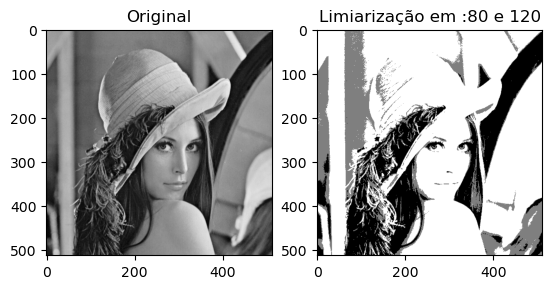

In [10]:
fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
imgplot = plt.imshow(img1, 'gray')
ax.set_title('Original')

ax = fig.add_subplot(1, 2, 2)
imgplot = plt.imshow(U[(numdtp - 1),:,:], 'gray')
ax.set_title(f'Limiarização em :{dados.multiLimiar[0]} e {dados.multiLimiar[1]}')

In [12]:
sImg22 = np.array(U[(numdtp - 1),:,:])
cv2.imwrite(f"output/multi_limiar1.png", sImg22)

True

In [13]:
img2 = cv2.imread('figs/building.tif',cv2.IMREAD_GRAYSCALE)

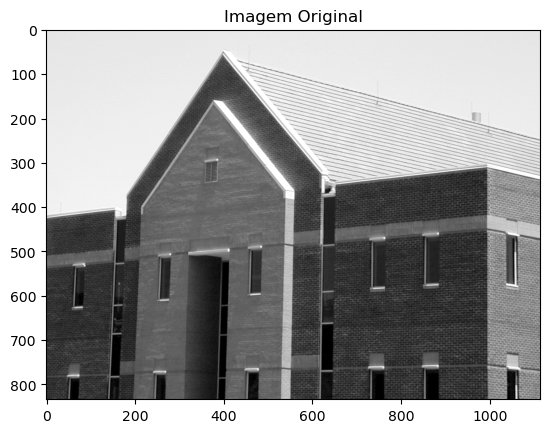

In [14]:
plt.figure(1)
plt.imshow(img2, 'gray')
plt.title('Imagem Original')
plt.show()

In [33]:
sImg23 = np.array(img2)
cv2.imwrite(f"output/multi_limiar0.png", sImg23)

True

In [15]:
dados2 = convertVarFeat(img2)
cHist = calcHistogram(dados2)

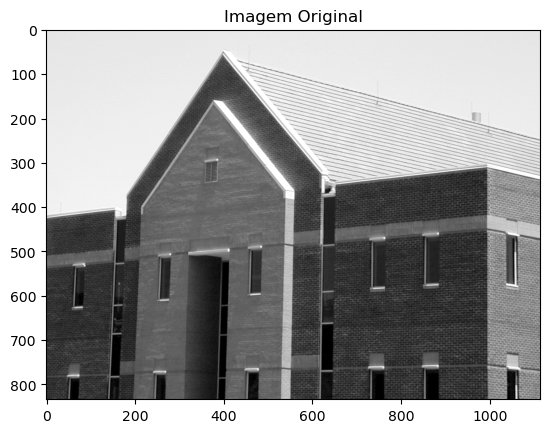

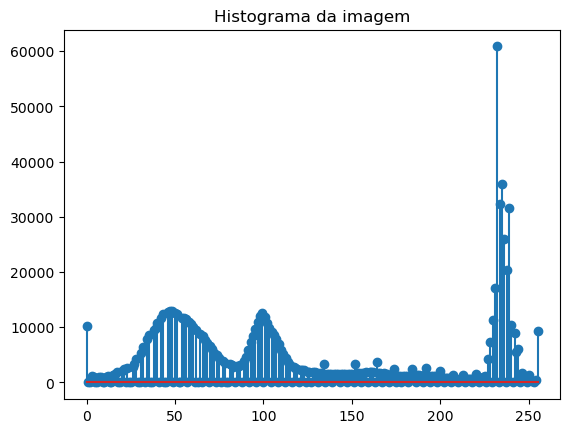

In [19]:
plt.figure(1)
plt.imshow(img2, 'gray')
plt.title('Imagem Original')

plt.figure(2)
plt.stem(cHist)
plt.savefig('output/histogram.png', format='png')
plt.title('Histograma da imagem')
plt.show()

In [20]:
dados2.multiLimiar = np.array([80, 120])
dados2.multiRange = np.array([127])

numdtp = 1;

U = np.zeros((numdtp, dados2.imgSize.lin, dados2.imgSize.col))

In [21]:
for k in range(0, numdtp):
    if k == 0:
        U[k,:,:] = multiThreshold(dados2)
        #print(U[k, :, :])
    else:
        dados.img = U[k-1,:,:]
        U[k, :, :] = multiThreshold(dados2)
        #print(U[k,:,:])

In [32]:
sImg24 = np.array(U[k, :, :])
cv2.imwrite(f"output/multi_limiar2.png", sImg24)

True

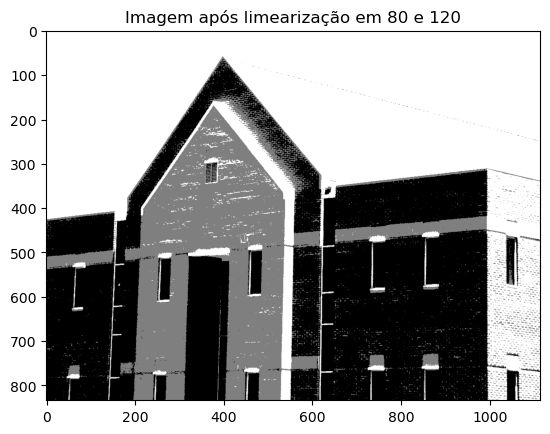

In [22]:
plt.figure(1)
plt.imshow(U[(numdtp - 1),:,:], vmin = 0, vmax = 255, cmap='gray')
plt.title("Imagem após limearização em %d e %d" %(dados2.multiLimiar[0], dados2.multiLimiar[1]))
plt.show()

In [24]:
dados2.multiLimiar = np.array([200, 250])
dados2.multiRange = np.array([127])

numdtp = 1;

U = np.zeros((numdtp, dados2.imgSize.lin, dados2.imgSize.col))

In [25]:
for k in range(0, numdtp):
    if k == 0:
        U[k,:,:] = multiThreshold(dados2)
        #print(U[k, :, :])
    else:
        dados.img = U[k-1,:,:]
        U[k, :, :] = multiThreshold(dados2)
        #print(U[k,:,:])

In [27]:
sImg23 = np.array(U[k, :, :])
cv2.imwrite(f"output/multi_limiar3.png", sImg23)

True

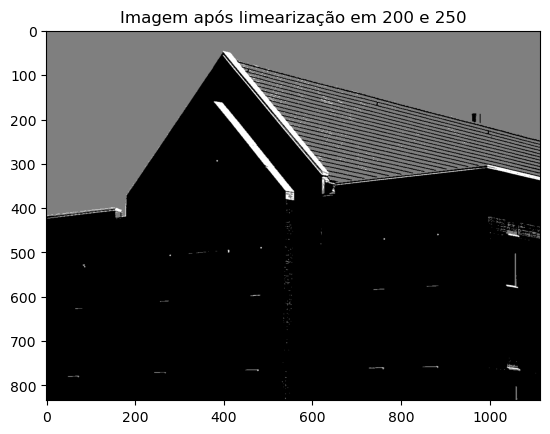

In [26]:
plt.figure(1)
plt.imshow(U[(numdtp - 1),:,:], vmin = 0, vmax = 255, cmap='gray')
plt.title("Imagem após limearização em %d e %d" %(dados2.multiLimiar[0], dados2.multiLimiar[1]))
plt.show()

In [28]:
dados2.multiLimiar = np.array([1, 250])
dados2.multiRange = np.array([127])

numdtp = 1;

U = np.zeros((numdtp, dados2.imgSize.lin, dados2.imgSize.col))

In [29]:
for k in range(0, numdtp):
    if k == 0:
        U[k,:,:] = multiThreshold(dados2)
        #print(U[k, :, :])
    else:
        dados.img = U[k-1,:,:]
        U[k, :, :] = multiThreshold(dados2)
        #print(U[k,:,:])

In [30]:
sImg25 = np.array(U[k, :, :])
cv2.imwrite(f"output/multi_limiar4.png", sImg25)

True

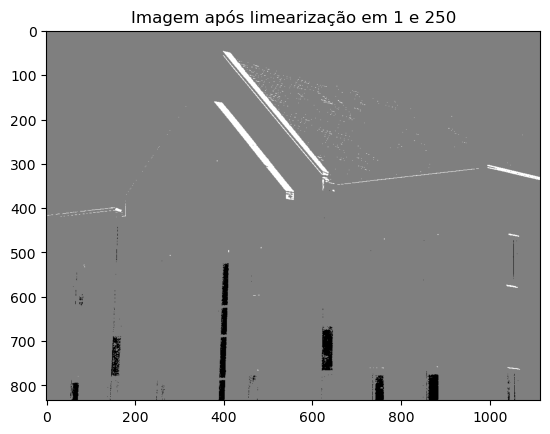

In [31]:
plt.figure(1)
plt.imshow(U[(numdtp - 1),:,:], vmin = 0, vmax = 255, cmap='gray')
plt.title("Imagem após limearização em %d e %d" %(dados2.multiLimiar[0], dados2.multiLimiar[1]))
plt.show()